<p style="font-family:verdana;color:#29285D;font-size:200%;text-align:center"><b>🛒
    Predict the probabilities of default  🛒<br>
    </p> 
<p style="font-family:verdana;text-align:center">***************</p>


<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 1 : Understand The Business Problem </h2>

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Business Statement 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         What is Credit Risk?

In simple words, it is the risk of borrower not repaying loan, 

credit card or any other type of loan. Sometimes customers pay some 

installments of loan but don't repay the full amount which includes 

principal amount plus interest.
           ![image.png](attachment:image.png)
        </p>
    </div>

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 2 : Load The Data </h2>

In [74]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [75]:
data=pd.read_csv('/kaggle/input/newdata/loan_data.csv',low_memory=False)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 3: EDA and Visualization </h2>

In [77]:
data.isnull().sum().head(40)

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                  27588
emp_length                 21008
home_ownership                 0
annual_inc                     4
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                      340302
purpose                        0
title                         20
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                   29
earliest_cr_line              29
inq_last_6mths                29
mths_since_last_delinq    250351
mths_since_last_record    403647
open_acc  

In [78]:
data.shape

(466285, 74)

In [79]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01




<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
              We're going to try to learn differences in the features between completed loans that have been Default. We won't consider loans that are current, don't meet the credit policy, defaulted, or have a missing status. So we only keep the loans with status "Default."
        </p>
    </div>

In [80]:

nulls = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2),columns=['null_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
verification_status_joint,100.00
annual_inc_joint,100.00
total_cu_tl,100.00
inq_fi,100.00
all_util,100.00
max_bal_bc,100.00
open_rv_24m,100.00
open_rv_12m,100.00
il_util,100.00
total_bal_il,100.00


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         Drop features missing more than 20% data
        </p>
    </div>

In [81]:
# Drop unneccesary columns
#data.drop('id','emp_title','url','desc',,'delinq_2yrs','earliest_cr_line','mths_since_last_delinq', 'mths_since_last_record',)

data = data.drop(['id','emp_title','emp_length','url','title','earliest_cr_line','mths_since_last_record','next_pymnt_d',
 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp','last_pymnt_d','mths_since_last_major_derog','annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m','mths_since_last_delinq','desc',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'], axis=1)

In [82]:
data.shape

(466285, 38)

In [83]:
data.isnull().sum()

member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
home_ownership                  0
annual_inc                      4
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                    29
inq_last_6mths                 29
open_acc                       29
pub_rec                        29
revol_bal                       0
revol_util                    340
total_acc                      29
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt   

In [84]:
data['annual_inc']=data['annual_inc'].fillna(data['annual_inc'].mean())
data['delinq_2yrs']=data['delinq_2yrs'].fillna(data['delinq_2yrs'].mean())
data['inq_last_6mths']=data['inq_last_6mths'].fillna(data['inq_last_6mths'].mean())
data['open_acc']=data['open_acc'].fillna(data['open_acc'].mean())
data['pub_rec']=data['pub_rec'].fillna(data['pub_rec'].mean())
data['revol_util']=data['revol_util'].fillna(data['revol_util'].mean())
data['total_acc']=data['total_acc'].fillna(data['total_acc'].mean())
data['collections_12_mths_ex_med']=data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].mean())

In [85]:
data.duplicated().any()

False

In [86]:
data.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_list_status            0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymn

<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px">step 4. Pre-processing and Exploratory Analysis¶

 </h2>

In [87]:
data.shape

(466285, 38)

In [88]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [89]:
target = [1 if i=='Default' else 0 for i in data['loan_status']]
data['target'] = target
data['target'].value_counts()

0    465453
1       832
Name: target, dtype: int64

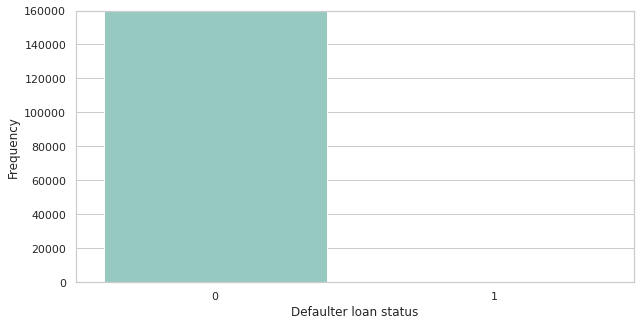

In [90]:
ax = sns.countplot(x = data.target ,palette="Set3")
sns.set(font_scale=1.5)
ax.set_ylim(top = 150000)
ax.set_xlabel('Defaulter loan status')
ax.set_ylabel('Frequency')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=160000)

plt.show()

we can see we have max customer who is not defaulter

In [91]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'target'],
      dtype='object')

Since no customer has taken loan again, we can drop member id .

In [92]:
data.drop(['member_id'], axis=1, inplace=True)

**loan_amnt**

Data Dictionary: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

In [93]:
data['loan_amnt'].describe()

count    466285.000000
mean      14317.277577
std        8286.509164
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

Text(0, 0.5, 'Loan Amount')

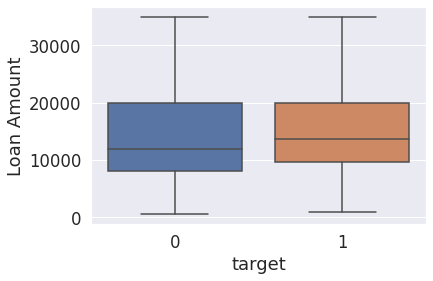

In [94]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plot_var('loan_amnt', 'Loan Amount', continuous=True)
sns.boxplot(x='target', y='loan_amnt', data=data)
plt.ylabel('Loan Amount')

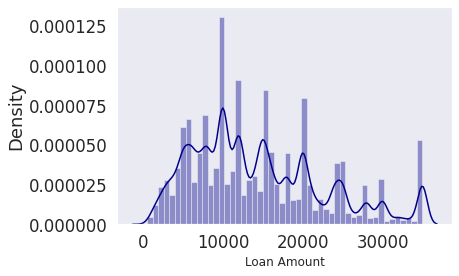

In [95]:
sns.distplot(data['loan_amnt'],color='darkblue')
plt.xlabel('Loan Amount',fontsize=12)
plt.grid()

**term**

Data Dictionary: "The number of payments on the loan. Values are in months and can be either 36 or 60."

In [96]:
data['term'].value_counts(dropna=False)

 36 months    337953
 60 months    128332
Name: term, dtype: int64

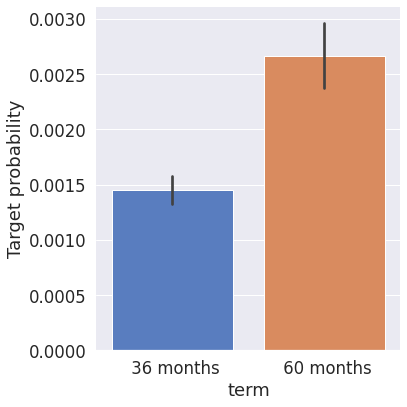

In [97]:
g  = sns.factorplot(x="term",y="target",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Target probability")

In [98]:
data['term'].value_counts(normalize=True)

 36 months    0.724778
 60 months    0.275222
Name: term, dtype: float64

In [99]:
data.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Default']

term
 36 months    0.001450
 60 months    0.002665
Name: loan_status, dtype: float64

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interfaces 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
          About 60% of the not deault loans have three-year periods, and the rest have five-year periods.
        </p>
    </div>

 **int_rate**
 
Data Dictionary: "Interest Rate on the loan."

In [100]:
data['int_rate'].describe()

count    466285.000000
mean         13.829236
std           4.357587
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64

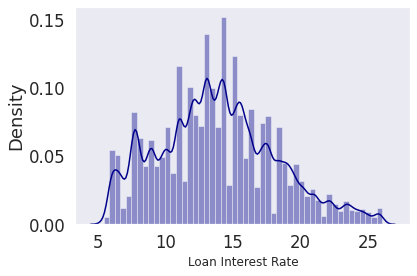

In [101]:
sns.distplot(data['int_rate'],color='darkblue')
plt.xlabel('Loan Interest Rate',fontsize=12)
plt.grid()

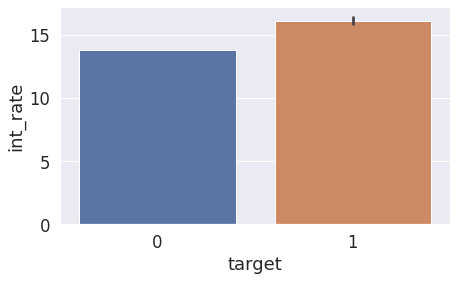

In [102]:
f, ax = plt.subplots(figsize=(7,4))
sns.barplot(y='int_rate', x="target",  data=data);

**installment**

Data Dictionary: "The monthly payment owed by the borrower if the loan originates."

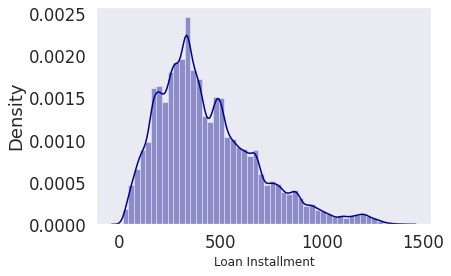

In [103]:
sns.distplot(data['installment'],color='darkblue')
plt.xlabel('Loan Installment',fontsize=12)
plt.grid()

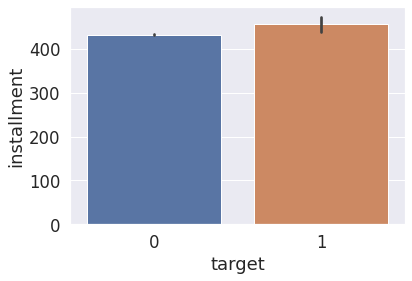

In [104]:
#f, ax = plt.subplots(figsize=(7,4))
sns.barplot(y='installment', x="target",  data=data);

In [105]:
data.groupby('target')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,465453.0,432.019237,243.490334,15.67,256.6700,379.82,566.5600,1409.99
1,832.0,455.537296,239.789217,33.21,288.4575,398.52,580.3025,1300.20


**** grade, sub_grade**
**

Data Dictionary for grade: "LendingClub assigned loan grade."

Data Dictionary for sub_grade: "LendingClub assigned loan subgrade."

In [106]:
print(sorted(data['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [107]:
data['grade'].value_counts()

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

In [108]:
print(sorted(data['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [109]:
data.drop('grade', axis=1, inplace=True)

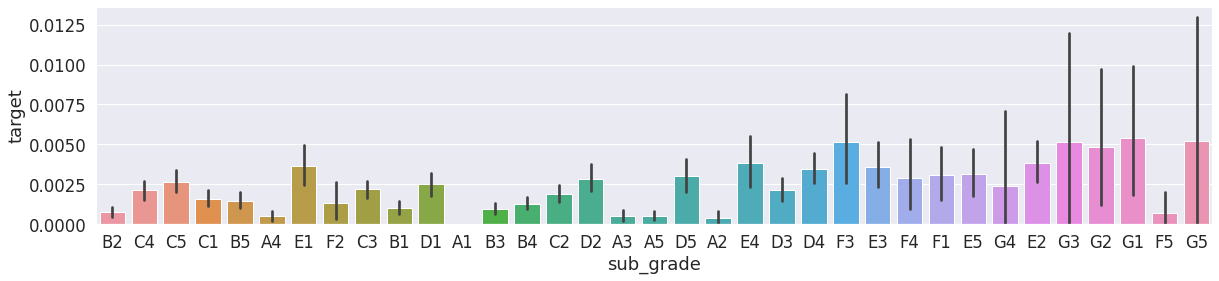

In [110]:
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='sub_grade', y="target",  data=data);

**home_ownership**

Data Dictionary: "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [111]:
data['home_ownership'].value_counts(dropna=False)

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

In [112]:
data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [113]:
data['home_ownership'].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          233
Name: home_ownership, dtype: int64

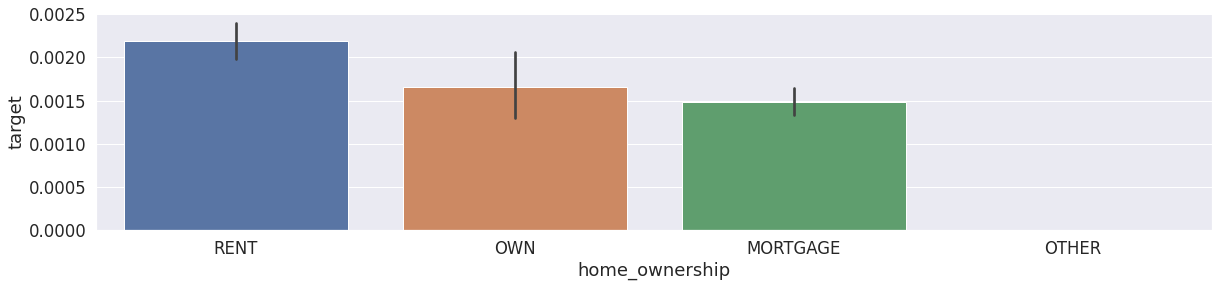

In [114]:
f, ax = plt.subplots(figsize=(20,4))
sns.barplot(x='home_ownership', y="target",  data=data);

In [115]:
data.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Default']

home_ownership
MORTGAGE    0.001488
OWN         0.001655
RENT        0.002186
Name: loan_status, dtype: float64

**annual_inc**

Data Dictionary: "The self-reported annual income provided by the borrower during registration."

In [116]:
data['annual_inc'].describe()

count    4.662850e+05
mean     7.327738e+04
std      5.496333e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.300000e+04
75%      8.895300e+04
max      7.500000e+06
Name: annual_inc, dtype: float64

In [117]:
data['annual_inc'] = data['annual_inc'].apply(lambda x: np.log10(x+1))

In [118]:
data['annual_inc'].describe()

count    466285.000000
mean          4.802122
std           0.226541
min           3.278067
25%           4.653222
50%           4.799347
75%           4.949165
max           6.875061
Name: annual_inc, dtype: float64

Text(0, 0.5, 'Anual Income')

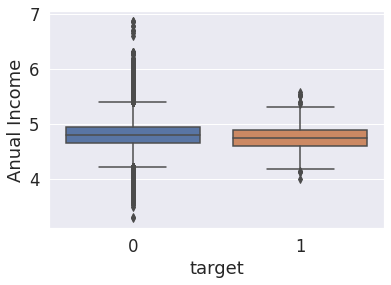

In [119]:
sns.boxplot(x='target', y='annual_inc', data=data)
plt.ylabel('Anual Income')

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        It appears that individuals with higher income are more likely to pay off their loans. Let's compare the summary statistics by loan status:
        </p>
    </div>

**purpose**

Data Dictionary: "A category provided by the borrower for the loan request."

In [120]:
data['purpose'].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

In [121]:
data.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Default'].sort_values()

purpose
major_purchase        0.000916
car                   0.000926
home_improvement      0.001130
credit_card           0.001546
medical               0.001738
small_business        0.001854
other                 0.001900
debt_consolidation    0.001984
moving                0.002004
vacation              0.002010
house                 0.002644
Name: loan_status, dtype: float64

**zip_code, addr_stat**

Data Dictionary for zip_code: "The first 3 numbers of the zip code provided by the borrower in the loan application."

Data Dictionary for addr_state: "The state provided by the borrower in the loan application.

In [122]:
data['zip_code'].sample(5)
data.drop(labels='zip_code', axis=1, inplace=True)

In [123]:
data.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,'Default'].sort_values()

addr_state
MS    0.000816
CT    0.000833
OR    0.000840
AL    0.000854
UT    0.000875
WY    0.000887
KS    0.000955
SD    0.001020
VT    0.001105
WI    0.001184
MO    0.001199
MN    0.001226
MD    0.001276
IL    0.001289
WA    0.001331
VA    0.001336
NH    0.001344
DC    0.001403
AR    0.001433
OK    0.001457
GA    0.001536
NM    0.001546
NC    0.001577
AK    0.001599
HI    0.001608
SC    0.001612
OH    0.001641
CO    0.001643
IN    0.001686
MI    0.001732
MA    0.001806
NY    0.001814
PA    0.001827
FL    0.001991
WV    0.002073
CA    0.002085
NJ    0.002159
LA    0.002186
TX    0.002223
KY    0.002253
TN    0.002340
RI    0.002439
AZ    0.002614
NV    0.003068
DE    0.003145
MT    0.003582
Name: loan_status, dtype: float64

Data Dictionary: "The number of open credit lines in the borrower's credit file."

Text(0.5, 1.0, 'Number of Open Credit Lines')

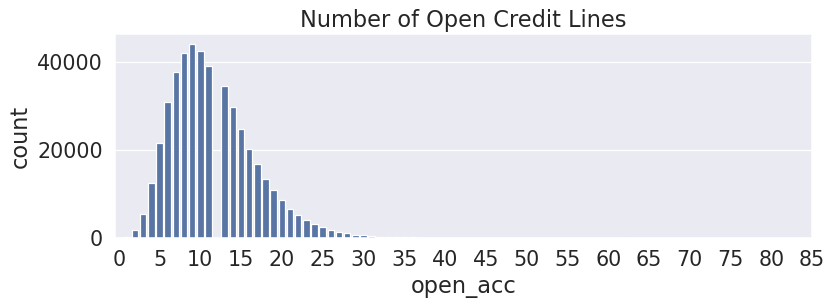

In [124]:
plt.figure(figsize=(10,3), dpi=90)
sns.countplot(data['open_acc'], order=sorted(data['open_acc'].unique()), color='#5975A4', saturation=1)
_, _ = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')

In [125]:
data.groupby('target')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,465453.0,11.185667,4.986866,0.0,8.0,10.0,14.0,84.0
1,832.0,11.971154,5.206599,2.0,8.0,11.0,15.0,33.0


In [126]:
data['application_type'].value_counts()

INDIVIDUAL    466285
Name: application_type, dtype: int64

In [127]:
data.drop(labels='application_type',axis=1,inplace=True)

In [128]:
data['policy_code'].head()

0    1
1    1
2    1
3    1
4    1
Name: policy_code, dtype: int64

In [129]:
data.drop(['policy_code','loan_status','collections_12_mths_ex_med','last_credit_pull_d','issue_d'],axis=1,inplace=True)

In [130]:
data.shape

(466285, 30)

In [131]:
data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
pymnt_plan                 0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
target                     0
dtype: int64

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Handling Categorical Data </h2>

There are no categorical variables with missing values, and therefore we don't need any NaN dummy variables.

Create dummy variables for the categorical variables:

In [132]:
categorical = []
for column in data:
    if data[column].dtype == 'object':
        categorical.append(column)
categorical

['term',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status']

In [133]:
data = pd.get_dummies(data, columns=['sub_grade', 'home_ownership', 'verification_status','pymnt_plan','purpose', 'addr_state', 'initial_list_status'], drop_first=True)

In [134]:
data['term']=data.term.str.replace(' months','').astype(int)

In [135]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,target,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,5000,5000,4975.0,36,10.65,162.87,4.380229,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,0.00,0.00,171.62,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,15.27,59.83,4.477136,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,117.08,1.11,119.66,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36,15.96,84.33,4.088242,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,0.00,0.00,649.91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000,10000,10000.0,36,13.49,339.31,4.691974,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,0.00,0.00,357.48,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000,3000,3000.0,60,12.69,67.79,4.903095,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,0.00,0.00,67.79,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 5 : Train/test split </h2>

In [136]:
data.shape

(466285, 126)

In [137]:
y_train = data['target']
y_test = data['target']

In [138]:
X_train = data.drop('target', axis=1)
X_test = data.drop('target', axis=1)
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,recoveries,collection_recovery_fee,last_pymnt_amnt,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,5000,5000,4975.0,36,10.65,162.87,4.380229,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,0.00,0.00,171.62,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,15.27,59.83,4.477136,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,117.08,1.11,119.66,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36,15.96,84.33,4.088242,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,0.00,0.00,649.91,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10000,10000,10000.0,36,13.49,339.31,4.691974,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,0.00,0.00,357.48,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3000,3000,3000.0,60,12.69,67.79,4.903095,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,0.00,0.00,67.79,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 6 : Model Building</h2>

**Building our credit scoring model**

<h2 style="color:#DC7633;">Randome Forest Classifier
</h2>

In [139]:
parameters = {'n_estimators': 50, 'random_state' : 20}
    
rf_model = RandomForestClassifier(**parameters)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=20)

In [140]:
# Accuracy of model
rf_model.score(X_test, y_test)

0.999944240110662

In [141]:
#probability of defaulter
defaultProba = rf_model.predict_proba(X_test)
ypred=rf_model.predict(X_test)
print(defaultProba)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [155]:
result_df=y_test
result_df=pd.DataFrame(columns=['y_test','default_proba','ypred'])
#result_df=pd.DataFrame{'y_test','default_proba',,'y_pred'}
result_df.head()

,y_test,default_proba,ypred


In [163]:
result_df['y_test']=y_test
result_df['default_proba']=defaultProba
result_df['ypred']=ypred

In [164]:
result_df.head()

,y_test,default_proba,ypred
0,0,1.0,0
1,0,1.0,0
2,0,1.0,0
3,0,1.0,0
4,0,1.0,0


In [165]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    465453
           1       1.00      0.97      0.98       832

    accuracy                           1.00    466285
   macro avg       1.00      0.98      0.99    466285
weighted avg       1.00      1.00      1.00    466285



Text(58.5, 0.5, 'Truth')

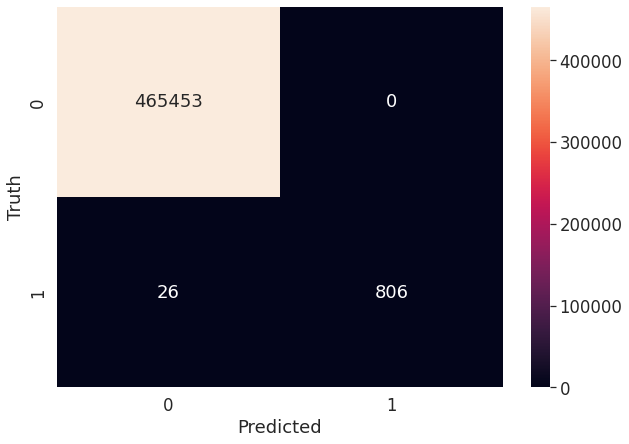

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2 style="color:#DC7633;">Logistic Regresion</h2>

In [167]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [168]:
model.fit(X_train, y_train)

LogisticRegression()

In [169]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [170]:
model.predict_proba(X_test)

array([[9.99577023e-01, 4.22976889e-04],
       [9.97479926e-01, 2.52007362e-03],
       [9.99296158e-01, 7.03841732e-04],
       ...,
       [9.98556893e-01, 1.44310653e-03],
       [9.96231590e-01, 3.76841005e-03],
       [9.99159906e-01, 8.40093605e-04]])

In [171]:
model.score(X_test,y_test)

0.9982156835411818

<h2 style="color:#DC7633;">xgboost</h2>

In [172]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [173]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [176]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [177]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.87%


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         So here we can see all the model are performed very well but we got highest accuracy almost 100% from Random Forest Algorithm. we can performed others algorithms also but we got the higest accuracy with this model so stopped here.  
</p>
 </div>